In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
#sys.setrecursionlimit(2000)
import sys
sys.setrecursionlimit(2000)

In [5]:
df=pd.read_csv('Desktop/datazs.csv')

In [6]:
df

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.00,50.608,54.2000,38.000
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.00,28.800,22.0000,35.000
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.00,0.000,63.7216,54.400
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.00,122.608,52.0000,42.000
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.00,0.000,19.0000,20.000
5,5,244.0,-145.0,-11.0,9.0,3.0,0.0,2000-01,32.0,34.0,...,"45.539131, -122.651648",shot - 17,NaN,20000012,1610612747,9.00,3.00,0.000,NaN,34.000
6,6,251.0,0.0,0.0,8.0,NaN,0.0,2000-01,52.0,20.0,...,"45.539131, -122.651648",NaN,shot - 4,20000012,1610612747,8.00,3.00,0.000,112.2000,89.400
7,7,254.0,1.0,28.0,8.0,3.0,0.0,2000-01,5.0,22.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,68.64,3.00,0.000,5.0000,22.000
8,8,265.0,-65.0,NaN,6.0,3.0,0.0,2000-01,12.0,32.0,...,"45.539131, -122.651648",shot - 36,NaN,20000012,1610612747,6.00,3.00,0.000,12.0000,32.000
9,9,294.0,-33.0,NaN,3.0,3.0,0.0,2000-01,36.0,32.0,...,"45.539131, -122.651648",shot - 44,NaN,20000012,1610612747,3.00,3.00,0.000,52.2000,NaN


In [7]:
df.isnull().sum()

Unnamed: 0                   0
match_event_id            1563
location_x                1461
location_y                1540
remaining_min             1562
power_of_shot             1486
knockout_match            1517
game_season               5804
remaining_sec             1594
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics               1575
range_of_shot             1564
team_name                 1535
date_of_game              1550
home/away                 1497
shot_id_number               0
lat/lng                   1565
type_of_shot             15280
type_of_combined_shot    15417
match_id                     0
team_id                      0
remaining_min.1           1535
power_of_shot.1           1539
knockout_match.1          1493
remaining_sec.1           1539
distance_of_shot.1        1568
dtype: int64

In [8]:
#df['is_goal'].fillna(0, inplace = True)
df['knockout_match'].fillna(0, inplace = True)
df['location_y'].fillna(method='bfill', inplace = True)
df['location_x'].fillna(method='ffill', inplace = True)
df['distance_of_shot'].fillna(method='ffill', inplace = True)
df['remaining_min'].fillna(method='ffill', inplace = True)
df['remaining_sec'].fillna(method='ffill', inplace = True)
df['power_of_shot'].fillna(method='ffill', inplace = True)
df['area_of_shot'].fillna("Center(c)", inplace = True)
df['shot_basics'].fillna("Mid Range", inplace = True)
df['range_of_shot'].fillna("4-20 ft", inplace = True)
df['type_of_combined_shot'].fillna(method='ffill', inplace = True)
df['date_of_game'].fillna(method='bfill',axis=0,inplace=True)
df['game_season'].fillna(method='bfill',axis=0,inplace=True)
df['home/away'].fillna(method='bfill',axis=0,inplace=True)
df['type_of_shot'].fillna(method='ffill',axis=0,inplace=True)

In [9]:
df['type_of_combined_shot'].fillna('shot-1',inplace=True)
df

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,shot-1,20000012,1610612747,10.00,1.00,50.608,54.2000,38.000
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,shot-1,20000012,1610612747,10.00,1.00,28.800,22.0000,35.000
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,shot-1,20000012,1610612747,92.64,1.00,0.000,63.7216,54.400
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",shot - 25,shot - 3,20000012,1610612747,NaN,1.00,122.608,52.0000,42.000
4,4,155.0,0.0,0.0,6.0,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",shot - 25,shot - 1,20000012,1610612747,42.64,2.00,0.000,19.0000,20.000
5,5,244.0,-145.0,-11.0,9.0,3.0,0.0,2000-01,32.0,34.0,...,"45.539131, -122.651648",shot - 17,shot - 1,20000012,1610612747,9.00,3.00,0.000,NaN,34.000
6,6,251.0,0.0,0.0,8.0,3.0,0.0,2000-01,52.0,20.0,...,"45.539131, -122.651648",shot - 17,shot - 4,20000012,1610612747,8.00,3.00,0.000,112.2000,89.400
7,7,254.0,1.0,28.0,8.0,3.0,0.0,2000-01,5.0,22.0,...,"45.539131, -122.651648",shot - 17,shot - 3,20000012,1610612747,68.64,3.00,0.000,5.0000,22.000
8,8,265.0,-65.0,238.0,6.0,3.0,0.0,2000-01,12.0,32.0,...,"45.539131, -122.651648",shot - 36,shot - 3,20000012,1610612747,6.00,3.00,0.000,12.0000,32.000
9,9,294.0,-33.0,238.0,3.0,3.0,0.0,2000-01,36.0,32.0,...,"45.539131, -122.651648",shot - 44,shot - 3,20000012,1610612747,3.00,3.00,0.000,52.2000,NaN


In [10]:
test_set = df[df.is_goal.isnull()]

#test_set.drop('is_goal',axis=1,inplace=True)
#data = test_set[test_set['shot_id_number'].notnull()]

x=test_set[['shot_id_number','is_goal']]
test_set.columns
x

,shot_id_number,is_goal
0,1,NaN
7,8,NaN
16,17,NaN
19,20,NaN
21,22,NaN
32,33,NaN
33,34,NaN
34,35,NaN
35,36,NaN
36,37,NaN


In [11]:
test_set

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,shot-1,20000012,1610612747,10.00,1.00,50.608,54.2000,38.0
7,7,254.0,1.0,28.0,8.0,3.0,0.0,2000-01,5.0,22.0,...,"45.539131, -122.651648",shot - 17,shot - 3,20000012,1610612747,68.64,3.00,0.000,5.0000,22.0
16,16,100.0,0.0,0.0,0.0,1.0,0.0,2000-01,1.0,20.0,...,"42.982923, -71.446094",shot - 12,shot - 4,20000019,1610612747,0.00,1.00,0.000,1.0000,20.0
19,19,249.0,0.0,0.0,10.0,3.0,0.0,2000-01,46.0,20.0,...,"42.982923, -71.446094",shot - 4,shot - 3,20000019,1610612747,10.00,70.36,0.000,46.0000,20.0
21,21,265.0,134.0,127.0,9.0,3.0,0.0,2000-01,4.0,38.0,...,"42.982923, -71.446094",shot - 24,shot - 3,20000019,1610612747,9.00,43.36,0.000,4.0000,38.0
32,32,4.0,163.0,76.0,11.0,1.0,0.0,2000-01,26.0,37.0,...,"49.250068, -123.114646",shot - 34,shot - 3,20000047,1610612747,11.00,1.00,0.000,26.0000,37.0
33,33,8.0,70.0,194.0,10.0,1.0,0.0,2000-01,58.0,40.0,...,"49.250068, -123.114646",shot - 34,shot - 3,20000047,1610612747,10.00,1.00,121.608,58.0000,40.0
34,34,26.0,1.0,19.0,7.0,1.0,0.0,2000-01,33.0,21.0,...,"49.250068, -123.114646",shot - 39,shot - 3,20000047,1610612747,NaN,1.00,0.000,33.0000,21.0
35,35,37.0,-12.0,4.0,5.0,1.0,0.0,2000-01,58.0,21.0,...,"49.250068, -123.114646",shot - 39,shot - 3,20000047,1610612747,5.00,104.36,102.608,58.0000,84.4
36,36,53.0,1.0,4.0,4.0,1.0,0.0,2000-01,9.0,20.0,...,"49.250068, -123.114646",shot - 39,shot - 4,20000047,1610612747,108.64,1.00,0.000,9.0000,59.4


In [13]:
df.dropna(subset=['is_goal'],inplace=True)

In [14]:
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
(total_missing/total_cells) * 100

1.4290684958743414

In [15]:
df

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,shot-1,20000012,1610612747,10.00,1.00,28.800,22.0000,35.000
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,shot-1,20000012,1610612747,92.64,1.00,0.000,63.7216,54.400
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",shot - 25,shot - 3,20000012,1610612747,NaN,1.00,122.608,52.0000,42.000
4,4,155.0,0.0,0.0,6.0,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",shot - 25,shot - 1,20000012,1610612747,42.64,2.00,0.000,19.0000,20.000
5,5,244.0,-145.0,-11.0,9.0,3.0,0.0,2000-01,32.0,34.0,...,"45.539131, -122.651648",shot - 17,shot - 1,20000012,1610612747,9.00,3.00,0.000,NaN,34.000
6,6,251.0,0.0,0.0,8.0,3.0,0.0,2000-01,52.0,20.0,...,"45.539131, -122.651648",shot - 17,shot - 4,20000012,1610612747,8.00,3.00,0.000,112.2000,89.400
8,8,265.0,-65.0,238.0,6.0,3.0,0.0,2000-01,12.0,32.0,...,"45.539131, -122.651648",shot - 36,shot - 3,20000012,1610612747,6.00,3.00,0.000,12.0000,32.000
9,9,294.0,-33.0,238.0,3.0,3.0,0.0,2000-01,36.0,32.0,...,"45.539131, -122.651648",shot - 44,shot - 3,20000012,1610612747,3.00,3.00,0.000,52.2000,NaN
10,10,309.0,-94.0,238.0,1.0,3.0,0.0,2000-01,56.0,45.0,...,"45.539131, -122.651648",shot - 7,shot - 3,20000012,1610612747,NaN,3.00,80.928,56.0000,45.000
11,11,4.0,121.0,127.0,11.0,1.0,0.0,2000-01,0.0,37.0,...,"42.982923, -71.446094",shot - 7,shot - 3,20000019,1610612747,11.00,1.00,106.608,64.7856,16.400


In [886]:
df.columns
#test_set.isnull().sum()

Index(['Unnamed: 0', 'match_event_id', 'location_x', 'location_y',
       'remaining_min', 'power_of_shot', 'knockout_match', 'game_season',
       'remaining_sec', 'distance_of_shot', 'is_goal', 'area_of_shot',
       'shot_basics', 'range_of_shot', 'team_name', 'date_of_game',
       'home/away', 'shot_id_number', 'lat/lng', 'type_of_shot',
       'type_of_combined_shot', 'match_id', 'team_id', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1'],
      dtype='object')

In [16]:
#df.drop('lat/lng',inplace=True,axis=1)

df.drop(['type_of_combined_shot','date_of_game','shot_basics','location_y','location_x','match_id','lat/lng','team_id','match_event_id','team_name','remaining_sec.1','remaining_min.1','knockout_match.1','power_of_shot','distance_of_shot.1'],inplace=True,axis=1)
test_set.drop(['type_of_combined_shot','date_of_game','shot_basics','location_y','location_x','lat/lng','match_id','team_id','match_event_id','team_name','is_goal','remaining_sec.1','remaining_min.1','knockout_match.1','power_of_shot','distance_of_shot.1'],inplace=True,axis=1)

C:\Users\khwaja wisal\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [17]:
#df=df.set_index('shot_id_number')

#test_set=test_set.set_index('shot_id_number')
df.rename(columns={'Unnamed: 0':'Index_col'}, inplace=True)
test_set.rename(columns={'Unnamed: 0':'Index_col'}, inplace=True)
df.columns

C:\Users\khwaja wisal\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Index(['Index_col', 'remaining_min', 'knockout_match', 'game_season',
       'remaining_sec', 'distance_of_shot', 'is_goal', 'area_of_shot',
       'range_of_shot', 'home/away', 'shot_id_number', 'type_of_shot',
       'power_of_shot.1'],
      dtype='object')

In [916]:
df.drop('Index_col',inplace=True,axis=1)
test_set.drop('Index_col',inplace=True,axis=1)

C:\Users\khwaja wisal\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
#df
test_set.columns

Index(['Index_col', 'remaining_min', 'knockout_match', 'game_season',
       'remaining_sec', 'distance_of_shot', 'area_of_shot', 'range_of_shot',
       'home/away', 'shot_id_number', 'type_of_shot', 'power_of_shot.1'],
      dtype='object')

In [19]:
df.columns

Index(['Index_col', 'remaining_min', 'knockout_match', 'game_season',
       'remaining_sec', 'distance_of_shot', 'is_goal', 'area_of_shot',
       'range_of_shot', 'home/away', 'shot_id_number', 'type_of_shot',
       'power_of_shot.1'],
      dtype='object')

In [875]:
#test_set = df[df.is_goal.isnull()]

df.drop('is_goal',axis=1,inplace=True)
len(df)
#test_set.drop('is_goal',axis=1,inplace=True)


24429

In [20]:
df.isnull().sum()

Index_col              0
remaining_min          0
knockout_match         0
game_season            0
remaining_sec          0
distance_of_shot       0
is_goal                0
area_of_shot           0
range_of_shot          0
home/away              0
shot_id_number         0
type_of_shot           0
power_of_shot.1     1208
dtype: int64

In [922]:
#df['remaining_min.1'].fillna(method='ffill', inplace = True)
#df['remaining_sec.1'].fillna(method='ffill', inplace = True)
df['power_of_shot.1'].fillna(method='ffill', inplace = True)
#df['knockout_match.1'].fillna(method='ffill', inplace = True)
#df['distance_of_shot.1'].fillna(method='ffill', inplace = True)

test_set['power_of_shot.1'].fillna(method='ffill', inplace = True)




print(len(test_set))
print(len(df))

6268
24429


C:\Users\khwaja wisal\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [923]:
test_set.isnull().sum()

remaining_min       0
knockout_match      0
game_season         0
remaining_sec       0
distance_of_shot    0
area_of_shot        0
range_of_shot       0
home/away           0
shot_id_number      0
type_of_shot        0
power_of_shot.1     0
dtype: int64

In [924]:
df.isnull().sum()

remaining_min       0
knockout_match      0
game_season         0
remaining_sec       0
distance_of_shot    0
is_goal             0
area_of_shot        0
range_of_shot       0
home/away           0
shot_id_number      0
type_of_shot        0
power_of_shot.1     0
dtype: int64

In [891]:
df['location_y'].fillna(23,inplace=True)

In [925]:
y=df['is_goal']

In [926]:
df.drop('is_goal',inplace=True,axis=1)
df.columns


Index(['remaining_min', 'knockout_match', 'game_season', 'remaining_sec',
       'distance_of_shot', 'area_of_shot', 'range_of_shot', 'home/away',
       'shot_id_number', 'type_of_shot', 'power_of_shot.1'],
      dtype='object')

In [927]:
test_set.columns

Index(['remaining_min', 'knockout_match', 'game_season', 'remaining_sec',
       'distance_of_shot', 'area_of_shot', 'range_of_shot', 'home/away',
       'shot_id_number', 'type_of_shot', 'power_of_shot.1'],
      dtype='object')

In [944]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.25, random_state = 0)


ValueError: Found input variables with inconsistent numbers of samples: [30697, 24429]

In [2]:
model = CatBoostClassifier(iterations=4500, learning_rate=0.02, l2_leaf_reg=3.5, depth=8, rsm=0.98, loss_function= 'Logloss', eval_metric='Accuracy',use_best_model=True,random_seed=42)

NameError: name 'CatBoostClassifier' is not defined

In [931]:
cate_features_index = np.where(df.dtypes != float)[0]
cate_features_index


array([2, 5, 6, 7, 8, 9], dtype=int64)

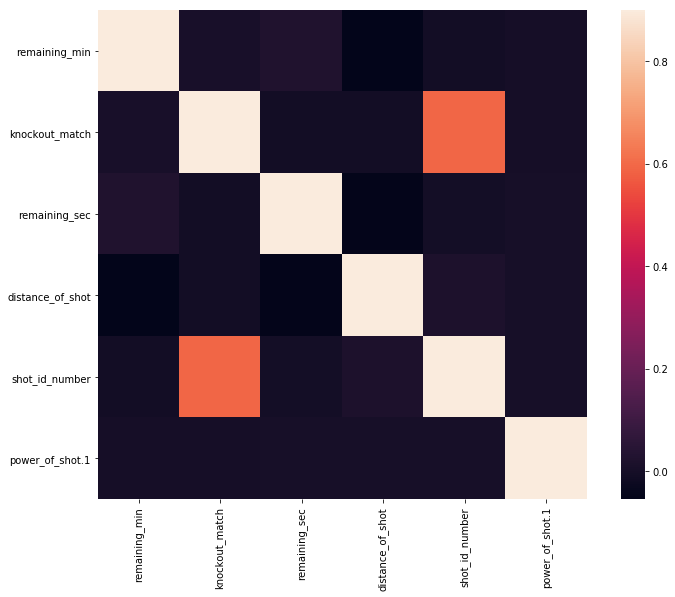

In [933]:
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)


In [1]:
#model.fit(X_train,y_train,)
model.fit(X_train,y_train,cat_features=cate_features_index,eval_set=(X_test,y_test))

NameError: name 'model' is not defined

In [838]:
from sklearn.metrics import mean_absolute_error,accuracy_score
X_train.columns
test_set.columns

Index(['Index_col', 'location_x', 'location_y', 'remaining_min',
       'power_of_shot', 'knockout_match', 'game_season', 'remaining_sec',
       'distance_of_shot', 'area_of_shot', 'shot_basics', 'range_of_shot',
       'date_of_game', 'home/away', 'shot_id_number', 'type_of_shot',
       'type_of_combined_shot', 'remaining_min.1', 'power_of_shot.1',
       'knockout_match.1', 'remaining_sec.1', 'distance_of_shot.1'],
      dtype='object')

In [850]:
X_train.columns
yprob=model.predict_proba(test_set)
yprob

array([[0.63372351, 0.36627649],
       [0.39317072, 0.60682928],
       [0.27732776, 0.72267224],
       ...,
       [0.42609281, 0.57390719],
       [0.58704979, 0.41295021],
       [0.40262888, 0.59737112]])

In [851]:
preds= yprob[:,1]
preds
x['is_goal']=preds
x

C:\Users\khwaja wisal\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,shot_id_number,is_goal
0,1,0.366276
7,8,0.606829
16,17,0.722672
19,20,0.600685
21,22,0.369049
32,33,0.354938
33,34,0.387983
34,35,0.415698
35,36,0.396060
36,37,0.394611


In [852]:
x.to_csv('Desktop/zsfirst113.csv',index=False)

In [853]:
preds=np.around(preds, decimals = 1)
x['is_goal']=preds
x.to_csv('Desktop/zsfirst133.csv',index=False)
x

C:\Users\khwaja wisal\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,shot_id_number,is_goal
0,1,0.4
7,8,0.6
16,17,0.7
19,20,0.6
21,22,0.4
32,33,0.4
33,34,0.4
34,35,0.4
35,36,0.4
36,37,0.4


In [854]:
df1=pd.read_csv('Desktop/sample11.csv')
df2=pd.read_csv('Desktop/zsfirst133.csv')
df2

,shot_id_number,is_goal
0,1,0.4
1,8,0.6
2,17,0.7
3,20,0.6
4,22,0.4
5,33,0.4
6,34,0.4
7,35,0.4
8,36,0.4
9,37,0.4


In [856]:
merged = df2.merge(df1, on='shot_id_number')
merged

,shot_id_number,is_goal_x,is_goal_y
0,1,0.4,0
1,8,0.6,0
2,17,0.7,0
3,20,0.6,0
4,33,0.4,0
5,34,0.4,0
6,35,0.4,0
7,36,0.4,0
8,37,0.4,0
9,38,0.4,0


In [857]:
merged.drop('is_goal_y',inplace=True,axis=1)

In [689]:
len(merged)

5000

In [858]:
merged.to_csv('Desktop/origsub1.csv',index=False)

In [692]:
df1

,shot_id_number,is_goal
0,1,0.3
1,8,0.5
2,17,0.7
3,20,0.4
4,33,0.3
5,34,0.4
6,35,0.4
7,36,0.6
8,37,0.4
9,38,0.4


In [935]:
from sklearn.feature_selection import RFECV

In [936]:
#using rfecv from feature_selection to see the fetaure importances to optimize our dataset
clf_rf_4 =CatBoostClassifier(iterations=2500, learning_rate=0.08, l2_leaf_reg=3.5, depth=8, rsm=0.98, loss_function= 'Logloss', eval_metric='Accuracy',use_best_model=True,random_seed=42)
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
#rfecv = rfecv.fit(X_train, y_train)


In [937]:
rfecv.fit(X_train,y_train)

ValueError: could not convert string to float: 'shot - 0'

In [703]:
goals=df[df["is_goal"]==1]

KeyError: 'is_goal'